__`NOTEBOOK START`__

Import our dependencies

In [9]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import tensorflow as tf

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import en_core_web_lg

from sklearn.metrics import confusion_matrix

import seaborn as sns

from keras.layers import Embedding, SimpleRNN, Dense, LSTM, GlobalMaxPool1D, GlobalAveragePooling1D


--------

# <center>__I - EXPLORATORY DATA ANALYSIS__</center>

--------

#### __SECTION PLAN__ 🎯

1. DATA DISCOVERY
2. DATA CLEANNING
3. DATA VISUALIZATION

--------
### __1. DATA DISCOVERY__
--------

In [10]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [11]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [12]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [13]:
def missing_values():
    
    missing = (pd.DataFrame(df.isnull().sum()/df.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())
print(f'Percentage of missing values in our DF: {((df.isnull().sum().sum()/df.size)*100).round(2)}%')
print(f'Total number of missing values: {df.isnull().sum().sum()}')
print(f'Total number of elements: {df.size}')
rows = df.shape[0]
print(f'Number of rows: {rows}') 

,Percentage of Missing Values,Number of Missing Values
Unnamed: 4,99.89,5566
Unnamed: 3,99.78,5560
Unnamed: 2,99.10,5522
v1,0.00,0
v2,0.00,0


Percentage of missing values in our DF: 59.76%
Total number of missing values: 16648
Total number of elements: 27860
Number of rows: 5572


--------
### __2. DATA CLEANNING__
--------

In [14]:
# Dropping columns with alomost no values
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

# Renaming the columns for clarity
df = df.rename (columns= {'v1': 'Target', 'v2': 'Messages'})

# Mapping the values in the Target column for futur model Ham Messages = 0; Spam Messages = 1
df['Target'] = df['Target'].map({'ham': 0, 'spam': 1})

df.head()

,Target,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.dtypes

Target       int64
Messages    object
dtype: object

--------
### __3. DATA VISUALIZATION__
--------

In [16]:
display(df['Target'].value_counts()/len(df)*100)

number_of_ham = df[df.Target==0].value_counts().sum()
number_of_spam = df[df.Target==1].value_counts().sum()
print (f'The number of Ham Messages is {number_of_ham} and the number of Spam Messages is {number_of_spam} ')

0    86.593683
1    13.406317
Name: Target, dtype: float64

The number of Ham Messages is 4825 and the number of Spam Messages is 747 


__OBSERVATIONS:__<br>
* Our dataset is very unbalanced.

* We only have 13,4% of messages labeled as Spams

* A large majority of messages are labeled as Ham with 86,6%. 

Word distribution for our two class SPAM and HAM

In [18]:
# An interesting information to get is the number of word in SPAM and HAM messages. 
df['Messages_Length'] = df['Messages'].apply(len)
df.head()

,Target,Messages,Messages_Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
fig = px.histogram(df, x='Messages_Length', color='Target', marginal='box')

fig.update_layout(
    barmode='overlay',
    height=650,
    title='<b>Distribution of "Messages_Length" by "Target"</b>',
    title_font={"size": 20},
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    xaxis={'title_font': {'size': 16}},
    yaxis={'title_font': {'size': 16}}
    )

fig.update_traces(
    opacity=0.80
    )

fig.show()

In [21]:
Messages_info = df.groupby('Target')['Messages_Length'].aggregate(['sum', 'size', 'mean', 'median', 'min', 'max', 'count']).round(2)
pd.DataFrame(Messages_info)

,sum,size,mean,median,min,max,count
Target,,,,,,,
0,342689,4825,71.02,52.0,2,910,4825
1,103733,747,138.87,149.0,13,224,747


__OBSERVATIONS__<br>
* We can see that on average, messages labeled as 1 = SPAM, in red in the graph above, contains more words than 0 = HAM messages.

* SPAM messages have on average 138.87 words. The longest message is 224 words long.

* HAM messages have on average 71.02 words. This category holds the longest message with 910 words.

--------

# <center>__II - DEEP LEARNING__</center>

--------

#### __SECTION PLAN__ 🎯

1. PREPROCESSING
2. BASELINE MODEL: SIMPLE RNN
3. LONG SHORT TERM MEMORY
4. GLOBAL AVERAGE POOLING
5. GLOBAL MAX POOLING
3. CLASSIFICATIONS EVALUATION

--------
### __1. PREPROCESSING__
--------

In [22]:
# I took the transformer pipeline "lg" for better accuracy in my next step with the stop words
print(">>>> 📋 Loading Spacy's Transformer Pipeline...")

nlp = en_core_web_lg.load()

print('>>>> ✅ ...Done')

>>>> 📋 Loading Spacy's Transformer Pipeline...
>>>> ✅ ...Done


In [23]:
print('>>>> 🧼 Data set cleaning in progress...')

df['Messages_Cleaned'] = df['Messages'].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))

df['Messages_Cleaned'] = df['Messages_Cleaned'].apply(lambda x: x.replace(" +"," ").lower().strip())

df['Messages_Cleaned'] = df['Messages_Cleaned'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

print('>>>> ✅ ...Done')
print()
print('Data set with Messages Cleaned: ')
df

>>>> 🧼 Data set cleaning in progress... (Could take around 8 to 10mn)
>>>> ✅ ...Done

Data set with Messages Cleaned: 


,Target,Messages,Messages_Length,Messages_Cleaned
0,0,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think usf live
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...
5568,0,Will Ì_ b going to esplanade fr home?,37,ì b esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,pity mood soany suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching act like d interested buy week free


In [24]:
mask = df['Messages_Cleaned'].isna()==False

df = df[mask]

In [25]:
print('>>>> 🧮 Tokenization in progress...')

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000) # instanciate the tokenizer

tokenizer.fit_on_texts(df['Messages_Cleaned'])

df['Messages_Encoded'] = tokenizer.texts_to_sequences(df.Messages_Cleaned)

print('>>>> ✅ ...Done')
print()
print('Data set with Messages Encoded: ')
df

>>>> 🧮 Tokenization in progress...
>>>> ✅ ...Done

Data set with Messages Encoded: 


,Target,Messages,Messages_Length,Messages_Cleaned,Messages_Encoded
0,0,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis n great wor...,"[232, 443, 460, 942, 35, 51, 203, 943, 79, 944..."
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,"[9, 194, 461, 288, 1]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 298, 3, 534, 663, 33, 846, 424, 20, 158, ..."
3,0,U dun say so early hor... U c already then say...,49,u dun early hor u c,"[1, 124, 149, 1, 83]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think usf live,"[705, 22, 664, 130]"
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[264, 18, 52, 3, 92, 1, 1, 33, 277, 69, 3, 48,..."
5568,0,Will Ì_ b going to esplanade fr home?,37,ì b esplanade fr home,"[45, 108, 576, 25]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,pity mood soany suggestion,[937]
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching act like d interested buy week free,"[112, 14, 32, 87, 38, 11]"


In [26]:
df['Encoded_Messages_Length'] = df['Messages_Encoded'].apply(lambda x: len(x))

df = df[df['Encoded_Messages_Length']!= 0]

df

,Target,Messages,Messages_Length,Messages_Cleaned,Messages_Encoded,Encoded_Messages_Length
0,0,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis n great wor...,"[232, 443, 460, 942, 35, 51, 203, 943, 79, 944...",11
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,"[9, 194, 461, 288, 1]",5
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 298, 3, 534, 663, 33, 846, 424, 20, 158, ...",13
3,0,U dun say so early hor... U c already then say...,49,u dun early hor u c,"[1, 124, 149, 1, 83]",5
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think usf live,"[705, 22, 664, 130]",4
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[264, 18, 52, 3, 92, 1, 1, 33, 277, 69, 3, 48,...",16
5568,0,Will Ì_ b going to esplanade fr home?,37,ì b esplanade fr home,"[45, 108, 576, 25]",4
5569,0,"Pity, * was in mood for that. So...any other s...",57,pity mood soany suggestion,[937],1
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching act like d interested buy week free,"[112, 14, 32, 87, 38, 11]",6


In [27]:
# Padding our data to respect dimentionalities
Messages_Pad = tf.keras.preprocessing.sequence.pad_sequences(df.Messages_Encoded, padding='post')

full_df = tf.data.Dataset.from_tensor_slices((Messages_Pad, df.Target.values))

In [28]:
# Splitting our Data 70/30
TAKE_SIZE = int(0.7*df.shape[0])

train_data = full_df.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(64)

test_data = full_df.skip(TAKE_SIZE)
test_data = test_data.batch(64)

In [29]:
for Messages, Target in train_data.take(1):
  print(Messages, Target)

tf.Tensor(
[[ 17 122   0 ...   0   0   0]
 [ 53 150 150 ...   0   0   0]
 [ 55 434 247 ...   0   0   0]
 ...
 [ 19   1   3 ...   0   0   0]
 [608 545  11 ...   0   0   0]
 [236 300 110 ...   0   0   0]], shape=(64, 47), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0], shape=(64,), dtype=int64)


In [30]:
Messages.shape[1]

47

--------
### __2. BASELINE MODEL: SIMPLE RNN__
--------

In [31]:
vocab_size = len(tokenizer.word_index)

model_Simple_RNN = tf.keras.Sequential([
    
    # Word Embedding layer           
    Embedding(vocab_size+1, 64, input_shape=[Messages.shape[1],],name="embedding"),

    SimpleRNN(units=64, return_sequences=True), # maintains the sequential nature
    SimpleRNN(units=32, return_sequences=False), # returns the last output

    # Dense layers once the data is flat
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    Dense(1, activation="sigmoid")
])

model_Simple_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 64)            525120    
                                                                 
 simple_rnn (SimpleRNN)      (None, 47, 64)            8256      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 537,153
Trainable params: 537,153
Non-trai

In [32]:
# Here we calculate the inverse of the frequency for each class 
weights = 1/(df['Target']).value_counts()

# We then multiple those results by the number of observations and divide by the number of class
weights = weights * len(df)/2

weights = {index : values for index , values in zip(weights.index, weights.values)}
weights

{0: 0.5797986289631534, 1: 3.632885906040268}

In [33]:
# Our optimizer is the stochastic gradient descent method called Adam for Adaptive moment estimation, in order to adapt the learning rate
Adam = tf.keras.optimizers.Adam()

model_Simple_RNN.compile(optimizer= Adam,
                        loss= tf.keras.losses.BinaryCrossentropy(),
                        metrics= ['accuracy']
                        )

In [34]:
# We fit our model on 20 epochs taking into account the weights we calculated above to penalize too frequent notes. 
history_Simple_RNN = model_Simple_RNN.fit(
    train_data,
    epochs= 20, 
    validation_data = test_data, 
    class_weight = weights
    )

Epoch 1/20
60/60 [==============================] - 13s 81ms/step - loss: 0.5577 - accuracy: 0.8678 - val_loss: 0.2397 - val_accuracy: 0.9132
Epoch 2/20
60/60 [==============================] - 4s 66ms/step - loss: 0.2959 - accuracy: 0.9203 - val_loss: 0.1999 - val_accuracy: 0.9353
Epoch 3/20
60/60 [==============================] - 3s 54ms/step - loss: 0.1902 - accuracy: 0.9572 - val_loss: 0.1316 - val_accuracy: 0.9643
Epoch 4/20
60/60 [==============================] - 3s 53ms/step - loss: 0.1417 - accuracy: 0.9715 - val_loss: 0.5560 - val_accuracy: 0.7278
Epoch 5/20
60/60 [==============================] - 3s 56ms/step - loss: 0.1303 - accuracy: 0.9728 - val_loss: 0.1420 - val_accuracy: 0.9674
Epoch 6/20
60/60 [==============================] - 3s 52ms/step - loss: 0.1036 - accuracy: 0.9802 - val_loss: 0.1216 - val_accuracy: 0.9667
Epoch 7/20
60/60 [==============================] - 3s 55ms/step - loss: 0.0822 - accuracy: 0.9810 - val_loss: 0.1398 - val_accuracy: 0.9637
Epoch 8/20
6

In [35]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y= history_Simple_RNN.history['loss'],
    mode='lines',
    name='Loss'))

fig.add_trace(go.Scatter(
    y= history_Simple_RNN.history['val_loss'],
    mode='lines',
    name='Val_Loss'))

fig.update_layout(
    height=650,
    title='<b>LOSS</b> on training and validation sets across epochs - <i>fig.1</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers:  SimpleRNN(64 units), SimpleRNN(32 units), Dense 16  ReLU Activation, Dense 8 ReLU Activation, Dense 1 Sigmoïd Activation • Epochs: 20 | Total params: 542,785</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='CROSS ENTROPY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,       
)

fig.show()

In [36]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history_Simple_RNN.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history_Simple_RNN.history["val_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          )
])

fig.update_layout(
    height=650,
    title='<b>ACCURACY</b> on training and validation sets across epochs - <i>fig.2</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers:  SimpleRNN(64 units), SimpleRNN(32 units), Dense 16  ReLU Activation, Dense 8 ReLU Activation, Dense 1 Sigmoïd Activation • Epochs: 20 | Total params: 542,785</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='ACCURACY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,     
)
fig.show()

__OBSERVATIONS__<br>
* We can see from both figures above that even if the loss is low in both cases, because of the SimpleRNN nature, we don't have a straigh line accross epochs. 

--------
### __2. LONG SHORT TERM MEMORY (LSTM)__
--------

In [37]:
vocab_size = len(tokenizer.word_index)

model_LSTM = tf.keras.Sequential([
    
    # Word Embedding layer           
    Embedding(vocab_size+1, 64, input_shape=[Messages.shape[1],], name="embedding"),

    LSTM(units=64, return_sequences=True),
    LSTM(units=32, return_sequences=False),

    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    # The last layer of our model is a sigmoid in order to treat our classification problem, SPAM or HAM
    Dense(1, activation='sigmoid')
])

model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 64)            525120    
                                                                 
 lstm (LSTM)                 (None, 47, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 571,233
Trainable params: 571,233
Non-tr

Because our target is highly imbalanced, we assign to each value of the target variable a weight that is inversely proportionnal to their frequency in the dataset. 

In [38]:
# Here we calculate the inverse of the frequency for each class 
weights = 1/(df['Target']).value_counts()

# We then multiple those results by the number of observations and divide by the number of class
weights = weights * len(df)/2

weights = {index : values for index , values in zip(weights.index, weights.values)}
weights

{0: 0.5797986289631534, 1: 3.632885906040268}

In [39]:
# Our optimizer is the stochastic gradient descent method called Adam for Adaptive moment estimation, in order to adapt the learning rate
Adam = tf.keras.optimizers.Adam()

model_LSTM.compile(optimizer= Adam,
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= ['accuracy']
              )

In [40]:
# We fit our model on 20 epochs taking into account the weights we calculated above to penalize too frequent notes. 
history_LSTM = model_LSTM.fit(
    train_data,
    epochs= 20, 
    validation_data = test_data, 
    class_weight= weights, 
    )

Epoch 1/20
60/60 [==============================] - 24s 163ms/step - loss: 0.6926 - accuracy: 0.3299 - val_loss: 0.6877 - val_accuracy: 0.8615
Epoch 2/20
60/60 [==============================] - 8s 128ms/step - loss: 0.6924 - accuracy: 0.5442 - val_loss: 0.6904 - val_accuracy: 0.8615
Epoch 3/20
60/60 [==============================] - 8s 128ms/step - loss: 0.6924 - accuracy: 0.8628 - val_loss: 0.6882 - val_accuracy: 0.8615
Epoch 4/20
60/60 [==============================] - 8s 125ms/step - loss: 0.6924 - accuracy: 0.8628 - val_loss: 0.6909 - val_accuracy: 0.8615
Epoch 5/20
60/60 [==============================] - 8s 131ms/step - loss: 0.5699 - accuracy: 0.8928 - val_loss: 0.6308 - val_accuracy: 0.9329
Epoch 6/20
60/60 [==============================] - 8s 139ms/step - loss: 0.4851 - accuracy: 0.9411 - val_loss: 0.6046 - val_accuracy: 0.9323
Epoch 7/20
60/60 [==============================] - 8s 131ms/step - loss: 0.4769 - accuracy: 0.9411 - val_loss: 0.5825 - val_accuracy: 0.9323
Epoch

In [41]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y= history_LSTM.history['loss'],
    mode='lines',
    name='Loss'))

fig.add_trace(go.Scatter(
    y= history_LSTM.history['val_loss'],
    mode='lines',
    name='Val_Loss'))

fig.update_layout(
    height=650,
    title='<b>LOSS</b> on training and validation sets across epochs - <i>fig.1</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers:  LSTM(64 units), LSTM(32 units), Dense 16  ReLU Activation, Dense 8 ReLU Activation, Dense 1 Sigmoïd Activation • Epochs: 20 | Total params: 576,865</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='CROSS ENTROPY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,       
)

fig.show()

In [42]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history_LSTM.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history_LSTM.history["val_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          )
])

fig.update_layout(
    height=650,
    title='<b>ACCURACY</b> on training and validation sets across epochs - <i>fig.2</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers:  LSTM(64 units), LSTM(32 units), Dense 16  ReLU Activation, Dense 8 ReLU Activation, Dense 1 Sigmoïd Activation • Epochs: 20 | Total params: 576,865</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='ACCURACY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,     
)
fig.show()

__OBSERVATIONS__<br>
* Our LSTM model performs better accross Epochs, which makes it more stable. 

--------
### __3. GLOBAL AVERAGE POOLING__
--------

In [43]:
vocab_size = len(tokenizer.word_index)

model_Global_Avg_Pool = tf.keras.Sequential([
    
    # Word Embedding layer           
    Embedding(vocab_size+1, 64, input_shape=[Messages.shape[1],], name="embedding"),

    GlobalAveragePooling1D(),

    Dense(8, activation='relu'),
    # The last layer of our model is a sigmoid in order to treat our classification problem, SPAM or HAM
    Dense(1, activation='sigmoid')
])

model_Global_Avg_Pool.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 64)            525120    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 525,649
Trainable params: 525,649
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Our optimizer is the stochastic gradient descent method called Adam for Adaptive moment estimation, in order to adapt the learning rate
Adam = tf.keras.optimizers.Adam()

model_Global_Avg_Pool.compile(optimizer= Adam ,
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= ['accuracy'])

In [45]:
# We fit our model on 20 epochs taking into account the weights we calculated above to penalize too frequent notes. 
history_Global_Avg_Pool = model_Global_Avg_Pool.fit(
    train_data,
    epochs= 20, 
    validation_data = test_data, 
    class_weight= weights, 
    )

Epoch 1/20
60/60 [==============================] - 4s 25ms/step - loss: 0.6864 - accuracy: 0.8543 - val_loss: 0.6459 - val_accuracy: 0.8651
Epoch 2/20
60/60 [==============================] - 1s 19ms/step - loss: 0.6637 - accuracy: 0.8810 - val_loss: 0.5928 - val_accuracy: 0.9058
Epoch 3/20
60/60 [==============================] - 1s 21ms/step - loss: 0.6094 - accuracy: 0.9272 - val_loss: 0.4817 - val_accuracy: 0.9335
Epoch 4/20
60/60 [==============================] - 1s 22ms/step - loss: 0.4971 - accuracy: 0.9654 - val_loss: 0.3638 - val_accuracy: 0.9674
Epoch 5/20
60/60 [==============================] - 1s 22ms/step - loss: 0.3397 - accuracy: 0.9778 - val_loss: 0.2344 - val_accuracy: 0.9766
Epoch 6/20
60/60 [==============================] - 1s 19ms/step - loss: 0.2285 - accuracy: 0.9815 - val_loss: 0.1747 - val_accuracy: 0.9784
Epoch 7/20
60/60 [==============================] - 1s 19ms/step - loss: 0.1700 - accuracy: 0.9823 - val_loss: 0.1500 - val_accuracy: 0.9815
Epoch 8/20
60

In [46]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y= history_Global_Avg_Pool.history['loss'],
    mode='lines',
    name='Loss'
))

fig.add_trace(go.Scatter(
    y= history_Global_Avg_Pool.history['val_loss'],
    mode='lines',
    name='Val_loss'
))

fig.update_layout(
    height=650,
    title='<b>LOSS</b> on training and validation sets across epochs - <i>fig.3</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers: GlobalMaxPool1D, Dense 8, Dense 1 with Sigmoïd Activation • Epochs: 20 | Total params: 531,281</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='CROSS ENTROPY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,     
)

fig.show()

In [47]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history_Global_Avg_Pool.history['accuracy'],
                          name='Accuracy',
                          mode='lines',
                          ),
                      go.Scatter(
                          y=history_Global_Avg_Pool.history['val_accuracy'],
                          name='Val_Accruracy',
                          mode='lines',
                          )
])

fig.update_layout(
    height=650,
    title='<b>ACCURACY</b> on training and validation sets across epochs - <i>fig.4</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers: GlobalAveragePooling1D, Dense 8, Dense 1 with Sigmoïd Activation • Epochs: 20 | Total params: 531,281</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='ACCURACY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,    
)
fig.show()

--------
### __4. GLOBAL MAX POOLING__
--------

Our text as been converted to a vector, with each word being a number, together combined, making those a vector. The vector size will depend on the vocabulary size, wich is equal to the total number of unique words in our text. 

Now, Global Max Pooling will take this vector as an input, find the largest number in it, and keep it as the output fo the Global Max Pooling Step, this way, the largest number is considered the most important information in the text. 

This makes our model very efficient as it only keeps the largest number, reducing the complexity of the vector input, and helping our model to focus on the most important information in the text. 

However, this simplification could become a problem as the model could discard other information, that are not present in the largets value of the input vector. 

In [48]:
vocab_size = len(tokenizer.word_index)

model_Global_Max_Pool = tf.keras.Sequential([

    # Word Embedding layer           
    Embedding(vocab_size+1, 64, input_shape=[Messages.shape[1],], name='embedding'),
    
    GlobalMaxPool1D(),

    Dense(8, activation='relu'),
    # The last layer of our model is a sigmoid in order to treat our classification problem, SPAM or HAM
    Dense(1, activation='sigmoid')
])

model_Global_Max_Pool.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 64)            525120    
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 525,649
Trainable params: 525,649
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Our optimizer is the stochastic gradient descent method called Adam for Adaptive moment estimation, in order to adapt the learning rate
Adam = tf.keras.optimizers.Adam()

model_Global_Max_Pool.compile(optimizer= Adam,
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= ['accuracy']
              )

In [50]:
# We fit our model on 20 epochs taking into account the weights we calculated above to penalize too frequent notes. 
history_Global_Max_Pool = model_Global_Max_Pool.fit(
    train_data,
    epochs= 20, 
    validation_data = test_data, 
    class_weight= weights, 
    )

Epoch 1/20
60/60 [==============================] - 4s 25ms/step - loss: 0.6417 - accuracy: 0.8543 - val_loss: 0.5792 - val_accuracy: 0.9514
Epoch 2/20
60/60 [==============================] - 1s 21ms/step - loss: 0.4530 - accuracy: 0.9723 - val_loss: 0.3522 - val_accuracy: 0.9667
Epoch 3/20
60/60 [==============================] - 1s 22ms/step - loss: 0.2334 - accuracy: 0.9784 - val_loss: 0.1850 - val_accuracy: 0.9711
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 0.1217 - accuracy: 0.9871 - val_loss: 0.1226 - val_accuracy: 0.9729
Epoch 5/20
60/60 [==============================] - 1s 21ms/step - loss: 0.0758 - accuracy: 0.9913 - val_loss: 0.0967 - val_accuracy: 0.9748
Epoch 6/20
60/60 [==============================] - 1s 24ms/step - loss: 0.0515 - accuracy: 0.9931 - val_loss: 0.0765 - val_accuracy: 0.9791
Epoch 7/20
60/60 [==============================] - 1s 22ms/step - loss: 0.0372 - accuracy: 0.9960 - val_loss: 0.0683 - val_accuracy: 0.9791
Epoch 8/20
60

In [51]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= history_Global_Max_Pool.history['loss'],
                    mode='lines',
                    name='Loss'))
fig.add_trace(go.Scatter(y= history_Global_Max_Pool.history['val_loss'],
                    mode='lines',
                    name='Val_Loss'))

fig.update_layout(
    height=650,
    title='<b>LOSS</b> on training and validation sets across epochs - <i>fig.5</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers: GlobalMaxPool1D, Dense 8, Dense 1 with Sigmoïd Activation • Epochs: 20 | Total params: 531,281</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='CROSS ENTROPY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,    
)

fig.show()

In [52]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history_Global_Max_Pool.history['accuracy'],
                          name='Accuracy',
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history_Global_Max_Pool.history['val_accuracy'],
                          name='Val_Accruracy',
                          mode='lines',
                          )
])

fig.update_layout(
    height=650,
    title='<b>ACCURACY</b> on training and validation sets across epochs - <i>fig.6</i>\
    <br><sup>Model hyperparameters:  Embedding Dimensions: 64 • Layers: GlobalMaxPool1D, Dense 8, Dense 1 with Sigmoïd Activation • Epochs: 20 | Total params: 531,281</sup>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='ACCURACY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,   
)
fig.show()

__OBSERVATIONS__<br>
* We get even better performance overall.

--------
### __5. CONFUSION MATRIX__
--------

In [53]:
y_true = np.concatenate([y for x, y in test_data], axis = 0)

y_pred = model_Global_Max_Pool.predict(test_data)

# we convert the probabilities to binary classes labels using a threshold of 0.5
# probs greater than 0.5 are replaced by a 1 and probs less or equal to 0.5 with 0.
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

26/26 [==============================] - 1s 5ms/step


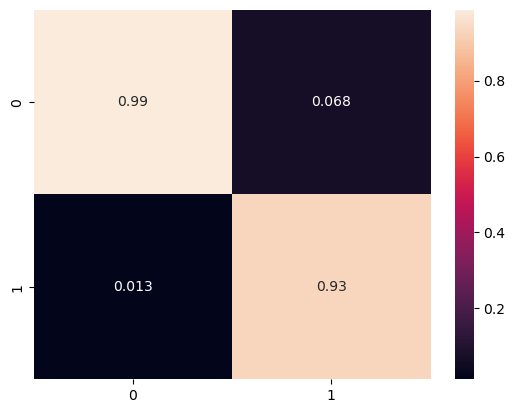

In [54]:
cm = confusion_matrix(y_true, y_pred_classes, normalize='pred')

sns.heatmap (cm, annot=True)

plt.show()

__OBSERVATIONS__<br>
* We get great scores for both True Positive at 99% and True Negatives at 93% ! This means that our model actual predict when the message is a Spam and when it is not.

* False Positive and False Negative are very low !

* Because of such great scores we are not going to use transfer learning.

__`NOTEBOOK END`__